# EDA STUUDENT PERFORMANCE INDICATOR

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Import the CSV Data as DataFrame

In [2]:
df = pd.read_csv('raw.csv')

In [3]:
df.head(10)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


In [4]:
print(f'Dataset have {df.shape[0]} raws and {df.shape[1]} columns')

Dataset have 1000 raws and 8 columns


In [5]:
df['parental_level_of_education'].value_counts()

parental_level_of_education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64

## Data Information
- gender: sex of student -> (Male/Female)
- race/ethnicity: ethnicity of student -> (Group A,B,C,C,E)
- perantal level of education: Parent's file education -> (bachelor's degree,master's degree,some college,
some high school, associate's degree)
- lunch: having lunch before test(standard or free/reduced)
- test prepration course: complete or not complete before test
- math score
- reading score
- writing score

## Data Checks to perform
- Check missing values
- Check duplicates
- Check the no of missing values in data
- Check statistics of data 
- Check vaious categories present in the different categoical column

### 1. Check Missing Values

In [6]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

There are no missing values in dataset

### 2. Check Duplicates

In [7]:
df.duplicated().sum()

0

There are no duplicate in our data

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### 3. Check unique values in data

In [9]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

math_score, reading_score and  are numerical features that's why these have large no. of unique values

### 4. Check statistics of data

In [10]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


- From above discription of numerical data, all means are very close to each other between 66 and 58.05
- All standard deviations are vey close between 14 and 15.19
- math_score have minimum score=0 and writing_score have much higher minimum score = 10  and reading_score more higher = 17

### 5. Check various categories

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [12]:
print(f"Column gender have {df['gender'].nunique()} categories: {df['gender'].unique()}")
print(f"Column race_ethnicity have {df['race_ethnicity'].nunique()} categories: {df['race_ethnicity'].unique()}")
print(f"Column parental_level_of_education have {df['parental_level_of_education'].nunique()} categories: \n {df['parental_level_of_education'].unique()}")
print(f"Column lunch have {df['lunch'].nunique()} categories: {df['lunch'].unique()}")
print(f"Column test_preparation_course have {df['test_preparation_course'].nunique()} categories: {df['test_preparation_course'].unique()}")


Column gender have 2 categories: ['female' 'male']
Column race_ethnicity have 5 categories: ['group B' 'group C' 'group A' 'group D' 'group E']
Column parental_level_of_education have 6 categories: 
 ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Column lunch have 2 categories: ['standard' 'free/reduced']
Column test_preparation_course have 2 categories: ['none' 'completed']


# Exploring Data 

In [13]:
# Define Numerical and Categorical features
num_features = df.select_dtypes(include='int64').columns
cat_features = df.select_dtypes(include='object').columns

print(f"We have {len(num_features)} numerical features: {list(num_features)}")
print(f"We have {len(cat_features)} catgorical features: {list(cat_features)}")


We have 3 numerical features: ['math_score', 'reading_score', 'writing_score']
We have 5 catgorical features: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [14]:
df['total_score'] = df['math_score']+df['reading_score']+df['writing_score']
df['average'] = df['total_score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [15]:
reading_full = df[df['reading_score']==100]['average'].count()
writing_full = df[df['writing_score']==100]['average'].count()
math_full = df[df['math_score']==100]['average'].count()

print(f'Numeber of students scored full marks in Maths: {math_full}')
print(f'Numeber of students scored full marks in Reading: {reading_full}')
print(f'Numeber of students scored full marks in Writing: {writing_full}')



Numeber of students scored full marks in Maths: 7
Numeber of students scored full marks in Reading: 17
Numeber of students scored full marks in Writing: 14


In [16]:
reading_less_20 = df[df['reading_score']<=20]['average'].count()
writing_less_20 = df[df['writing_score']<=20]['average'].count()
math_less_20 = df[df['math_score']<=20]['average'].count()

print(f'Numeber of students scored full marks in Maths: {math_less_20}')
print(f'Numeber of students scored full marks in Reading: {reading_less_20}')
print(f'Numeber of students scored full marks in Writing: {writing_less_20}')

Numeber of students scored full marks in Maths: 4
Numeber of students scored full marks in Reading: 1
Numeber of students scored full marks in Writing: 3


## Visualization

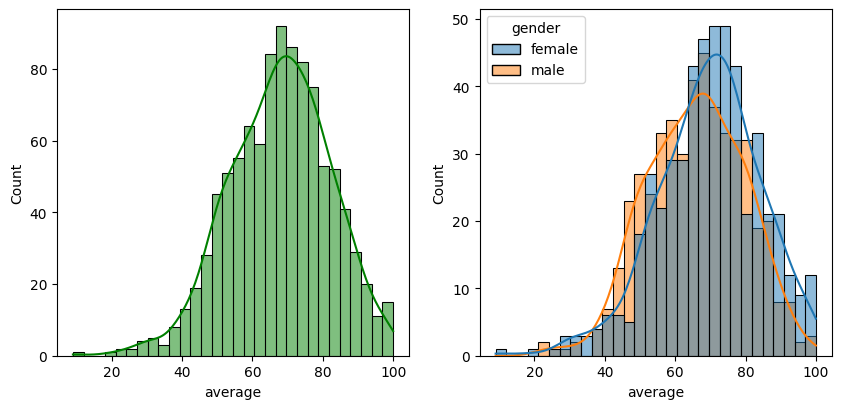

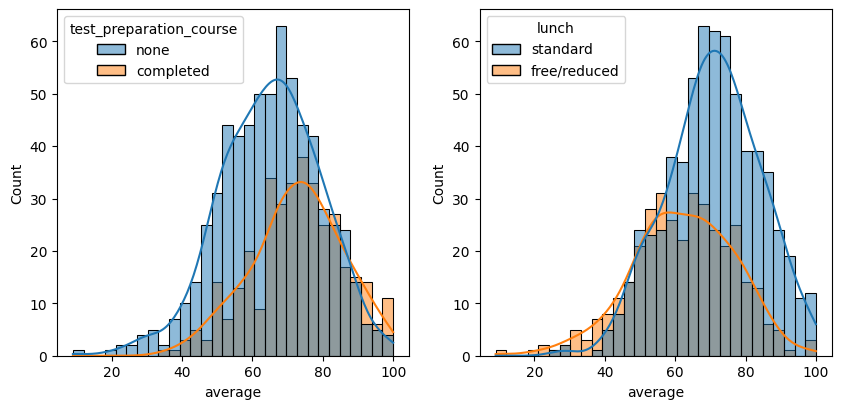

In [17]:
fig,ax = plt.subplots(1,2,figsize=(10,4.5))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average',bins=30,kde=True,hue='gender')
plt.show()
fig,ax = plt.subplots(1,2,figsize=(10,4.5))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True,hue='test_preparation_course')
plt.subplot(122)
sns.histplot(data=df,x='average',bins=30,kde=True,hue='lunch')
plt.show()


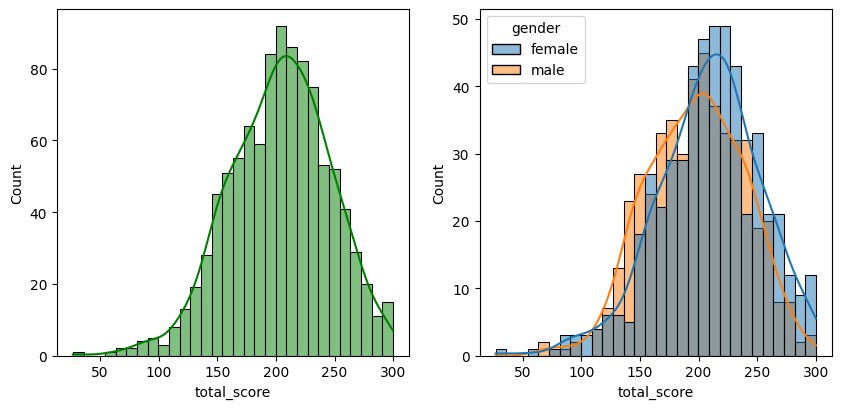

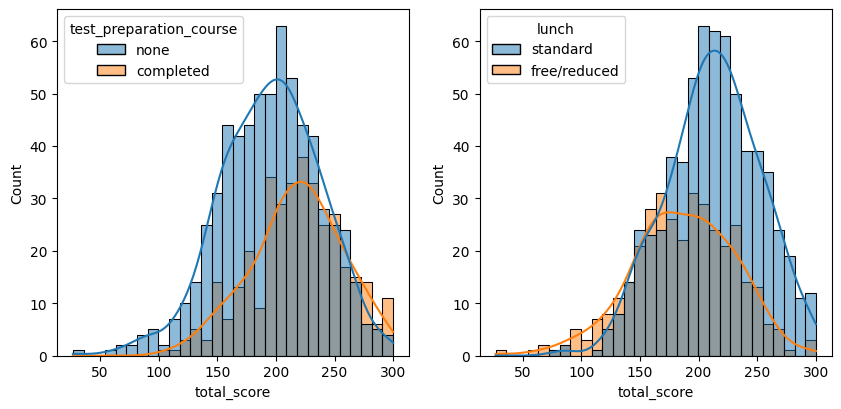

In [18]:
fig,ax = plt.subplots(1,2,figsize=(10,4.5))
plt.subplot(121)
sns.histplot(data = df,x='total_score',kde=True,bins=30,color='g')
plt.subplot(122)
sns.histplot(data = df,x='total_score',kde=True,bins=30,hue='gender')
plt.show()
fig,ax = plt.subplots(1,2,figsize=(10,4.5))
plt.subplot(121)
sns.histplot(data=df,x='total_score',bins=30,kde=True,hue='test_preparation_course')
plt.subplot(122)
sns.histplot(data=df,x='total_score',bins=30,kde=True,hue='lunch')
plt.show()


### Insights
- Female students tend to ferform well then male student
- Students have completed course have scored genraly higher
- Standard lunch have helped in scoring more marks

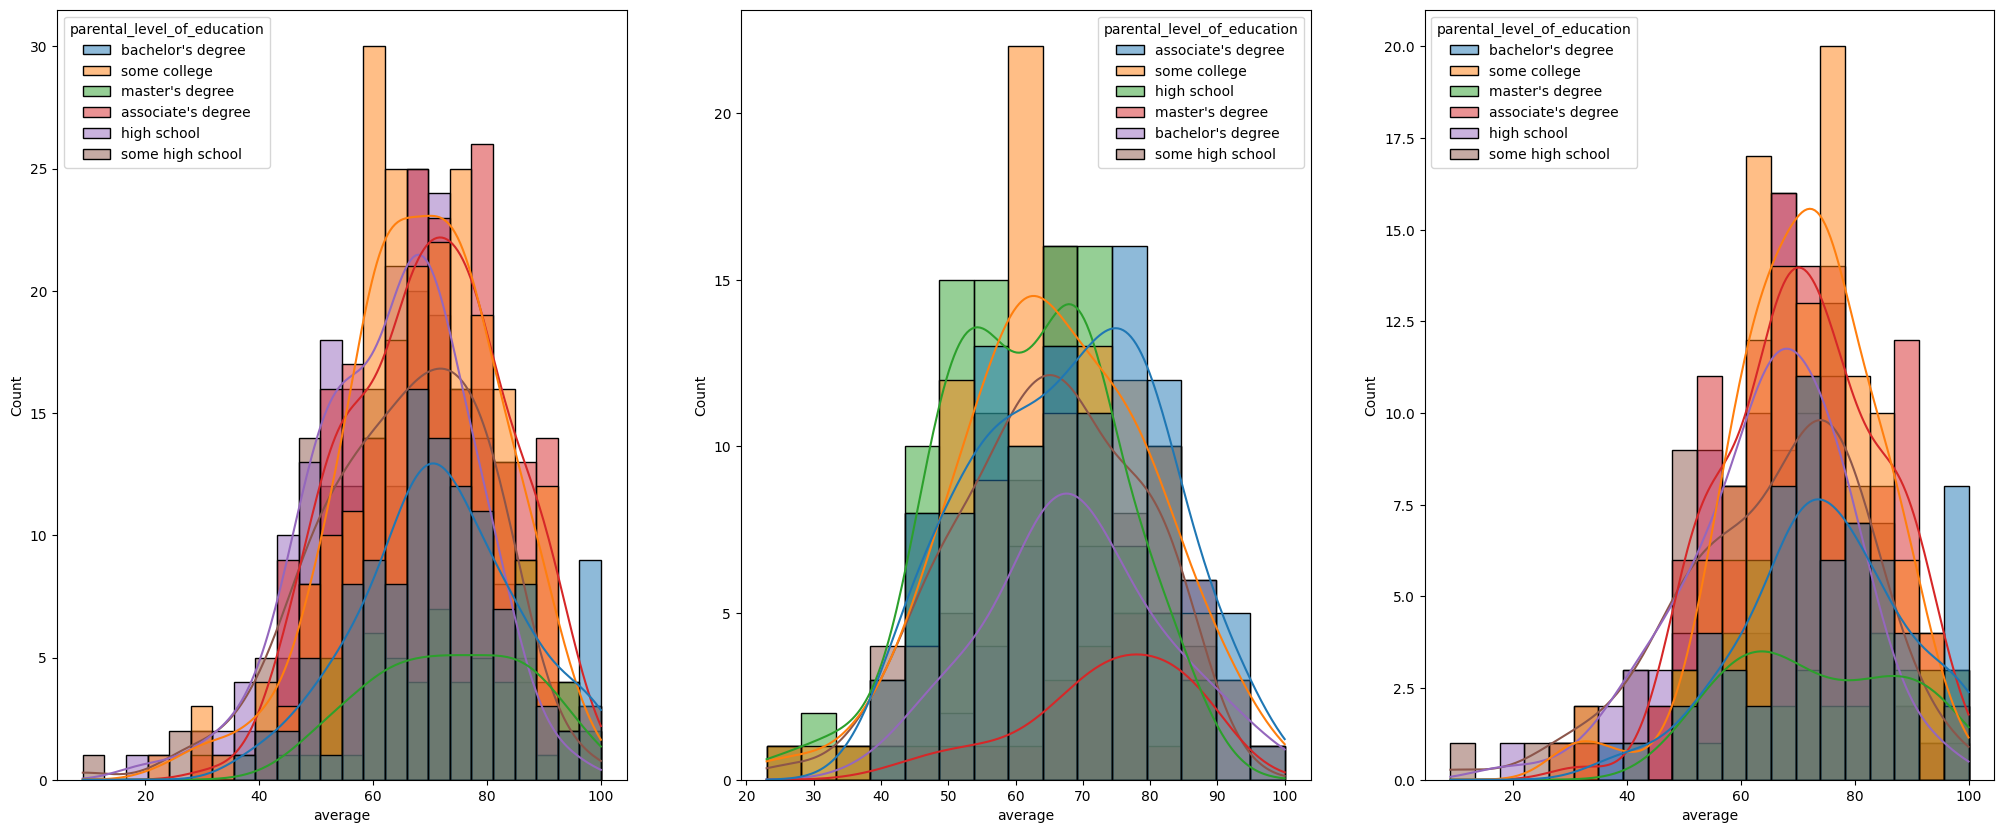

In [24]:
plt.subplots(1,3,figsize=(25,10))
plt.subplot(131)
ax =sns.histplot(data=df,x='average',kde=True,hue='parental_level_of_education')
plt.subplot(132)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='parental_level_of_education')
plt.subplot(133)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='parental_level_of_education')
plt.show()

### Insights
- In general parent's education don't help student perform well in exam.
- 2nd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam
- 3rd plot we can see there is no effect of parent's education on female students.

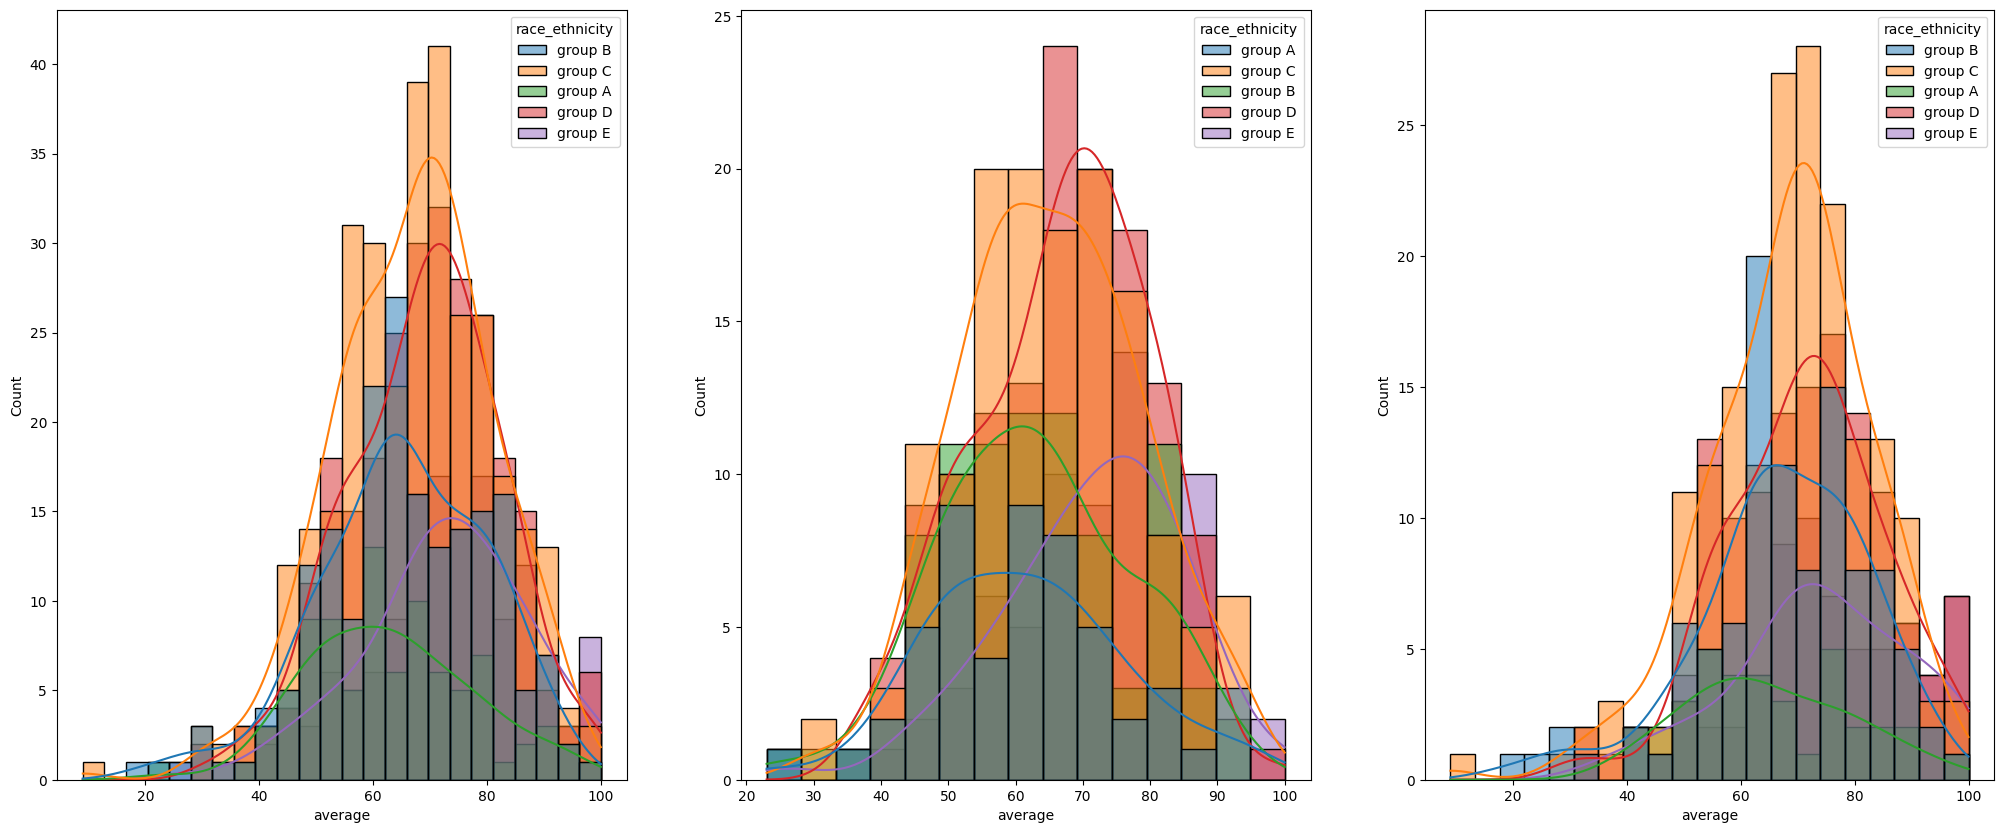

In [26]:
plt.subplots(1,3,figsize=(25,10))
plt.subplot(131)
ax =sns.histplot(data=df,x='average',kde=True,hue='race_ethnicity')
plt.subplot(132)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='race_ethnicity')
plt.subplot(133)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='race_ethnicity')
plt.show()

### Insights
- Students from group C and group D have performed well.
- Male students from group D have performed well and Female students from group C have performed well.
- Students from group E have performed well irespective thier gender.
- Students from group A and group B perform poorly irespetive of thier gender.

### Maximum score of student in all subject

In [35]:
x = np.arange(0,101)

In [37]:
len(x)

101

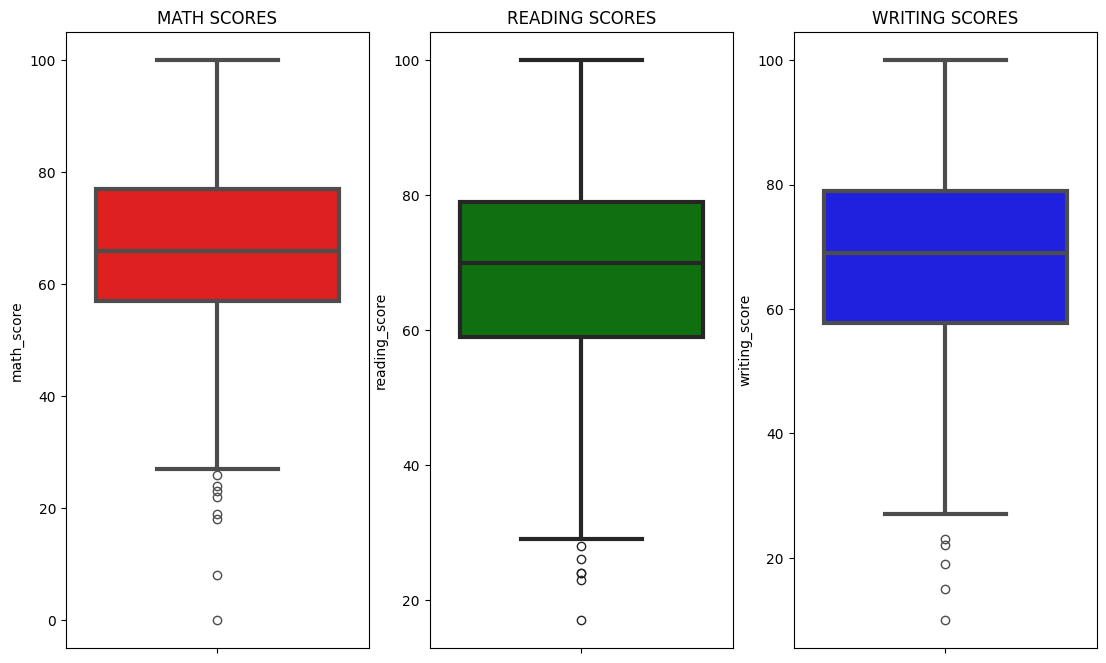

In [40]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.boxplot(y='math_score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.boxplot(y='reading_score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.boxplot(y='writing_score',data=df,color='blue',linewidth=3)
plt.show()

### Insights 
- Most students have scored between 65 and 75 in math where's most of them have score between 60 to 80 in reading and writing 

## Multivariate analysis using pieplot

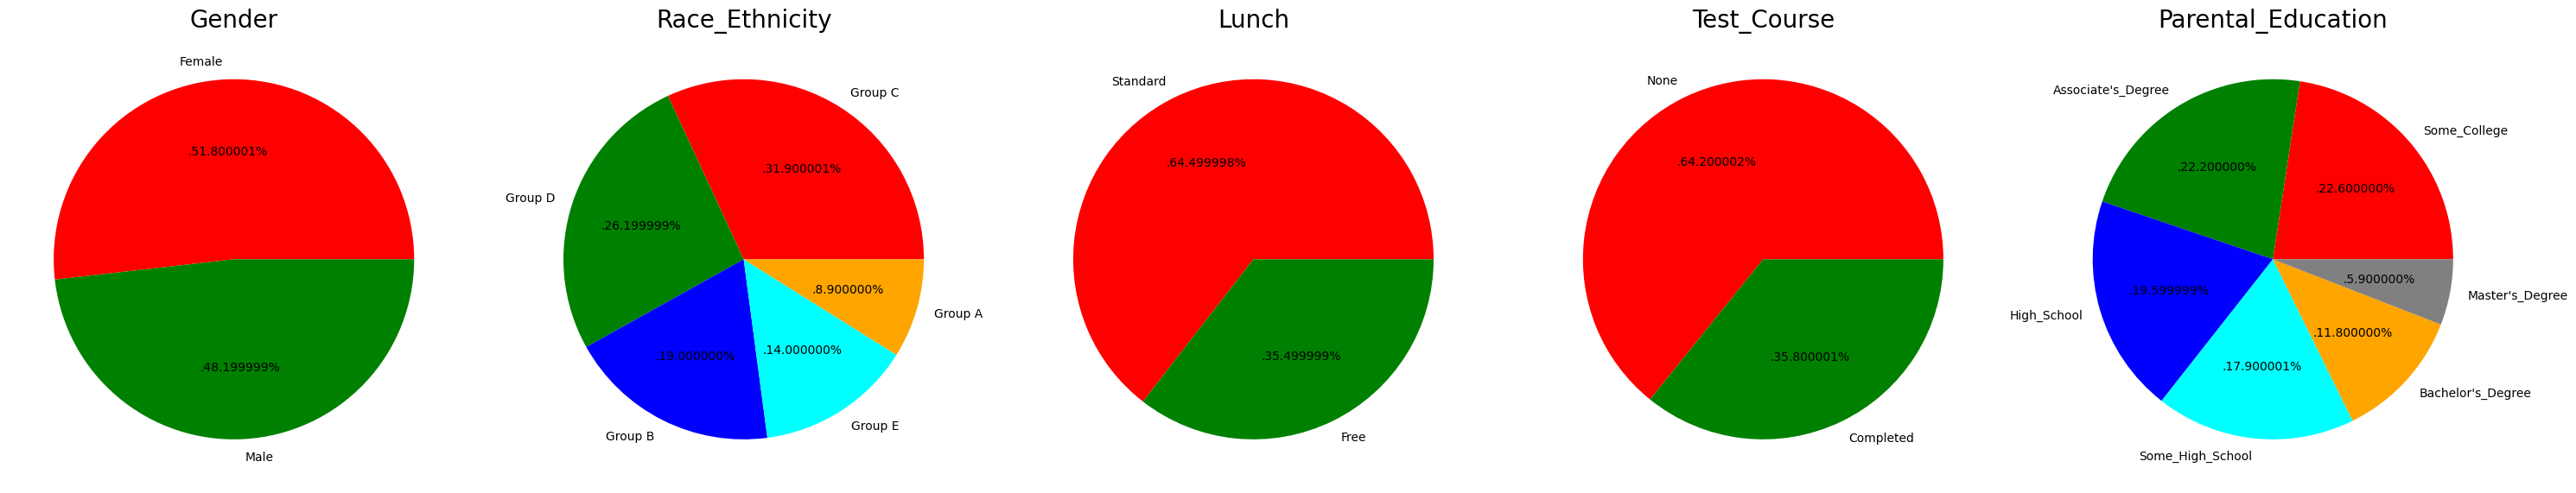

In [43]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')

plt.subplot(1, 5, 2)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race_Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test_Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some_College', "Associate's_Degree",'High_School','Some_High_School',"Bachelor's_Degree","Master's_Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental_Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

### Insights
- Number of Male and Female students is almost equal
- Number students are greatest in Group C
- Number of students who have standard lunch are greater
- Number of students who have not enrolled in any test preparation course is greater
- Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

# Feature Wise Visualization

### 1. GENDER COLUMN
- How is gender distributed
- Is gender have any impact omn students performance

### UNIVARIATE ANALYSIS ( How is distribution of Gender ? )

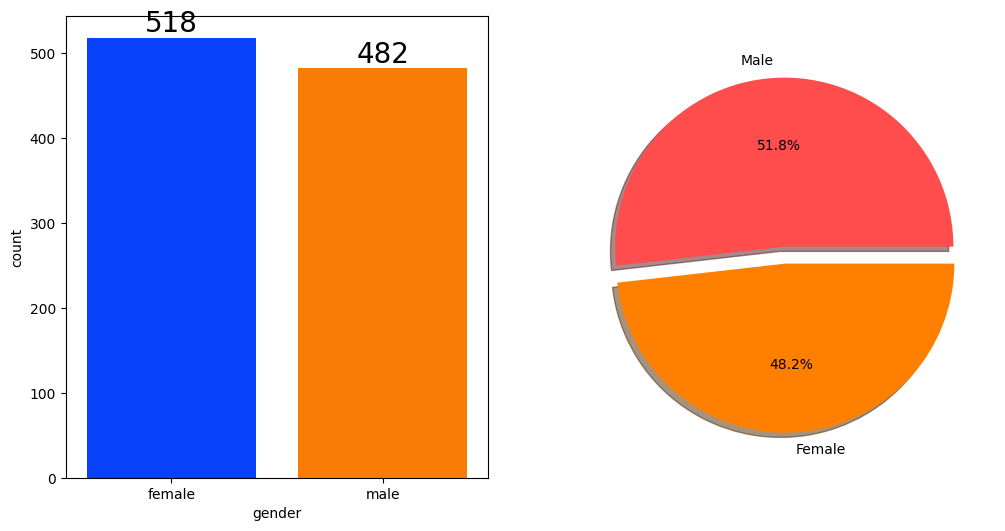

In [46]:
f,ax=plt.subplots(1,2,figsize=(12,6))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

- Gender has balanced data with female students are 518 (48%) and male students are 482 (52%)

### BIVARIATE ANALYSIS ( Is gender has any impact on student's performance ? )

In [48]:
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'total_score', 'average'],
      dtype='object')

In [53]:
gender_group_math = df.groupby('gender')['math_score'].mean()
gender_group_avg = df.groupby('gender')['average'].mean()
gender_group_math, gender_group_avg

(gender
 female    63.633205
 male      68.728216
 Name: math_score, dtype: float64,
 gender
 female    69.569498
 male      65.837483
 Name: average, dtype: float64)

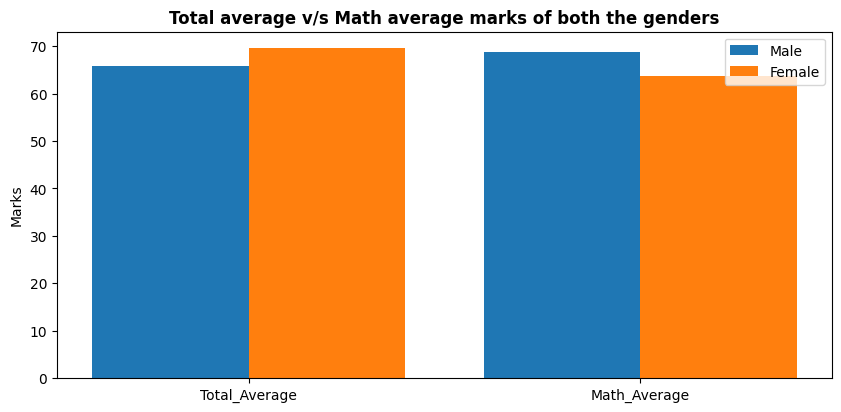

In [56]:
plt.figure(figsize=(10, 4.5))

X = ['Total_Average','Math_Average']


female_scores = [gender_group_avg[0], gender_group_math[0]]
male_scores = [gender_group_avg[1], gender_group_math[1]]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

### Insights
- On an average females have a better overall score than men.
- whereas males have scored higher in Maths.

## 2.RACE_EHNICITY COLUMN
- How is Group wise distribution ?
- Is Race/Ehnicity has any impact on student's performance ?

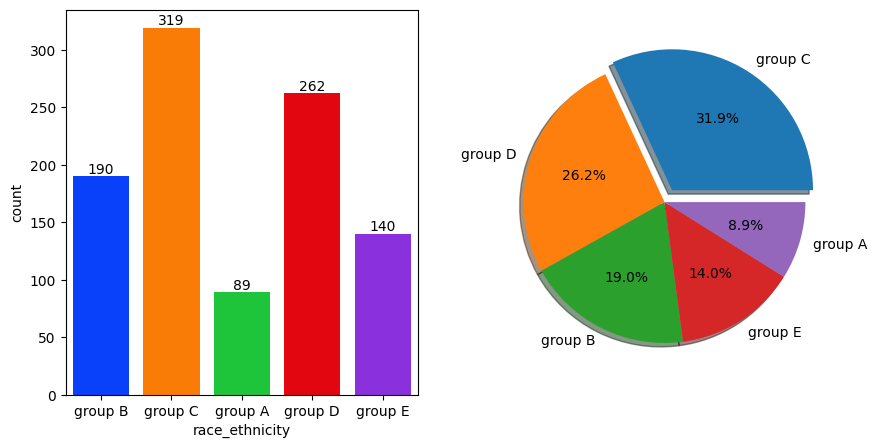

In [59]:
f,ax=plt.subplots(1,2,figsize=(10,5))
sns.countplot(x=df['race_ethnicity'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=10)
    
plt.pie(x = df['race_ethnicity'].value_counts(),labels=df['race_ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()   

### Insights
- Most of the student belonging from group C /group D.
- Lowest number of students belong to groupA.

### BIVARIATE ANALYSIS ( Is Race/Ehnicity has any impact on student's performance ? )

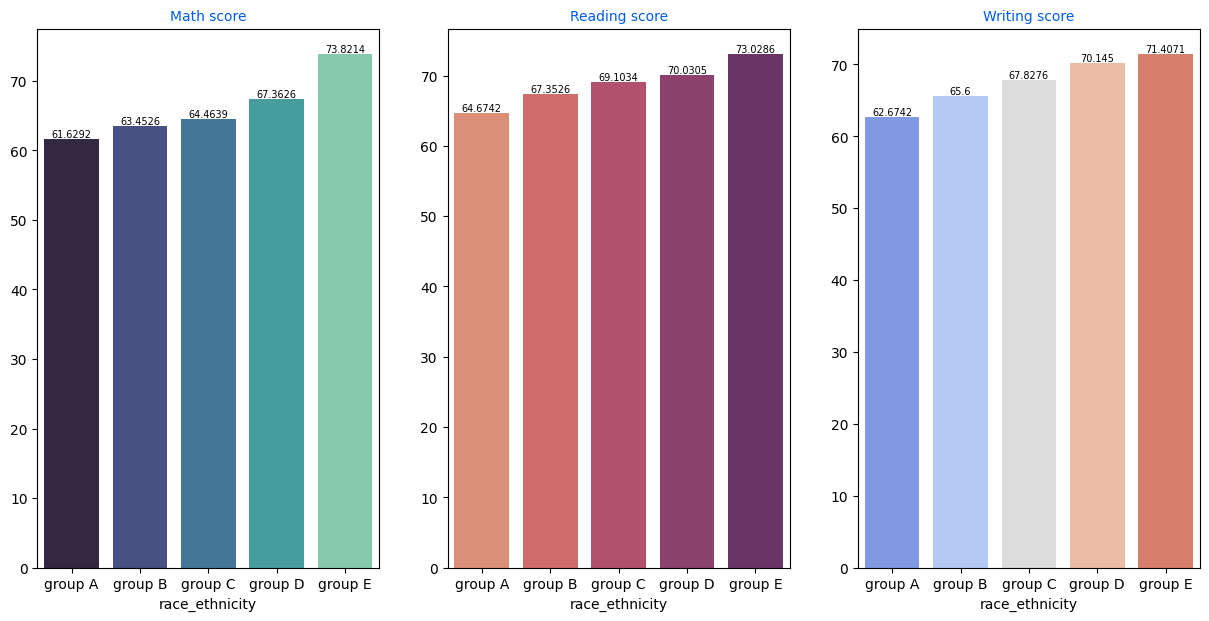

In [63]:
group_data2_math=df.groupby('race_ethnicity')['math_score']
group_data2_read=df.groupby('race_ethnicity')['reading_score']
group_data2_write=df.groupby('race_ethnicity')['writing_score']
f,ax=plt.subplots(1,3,figsize=(15,7))
sns.barplot(x=group_data2_math.mean().index,y=group_data2_math.mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=10)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=7)

sns.barplot(x=group_data2_read.mean().index,y=group_data2_read.mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=10)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=7)

sns.barplot(x=group_data2_write.mean().index,y=group_data2_write.mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=10)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=7)

### Insights
- Group E students have scored the highest marks.
- Group A students have scored the lowest marks.
- Students from a lower Socioeconomic status have a lower avg in all course subjects

## 2.PARENTAL LEVEL OF EDUCATION COLUMN
- What is educational background of student's parent ?
- Is parental education has any impact on student's performance ?

### UNIVARIATE ANALYSIS ( What is educational background of student's parent ? )

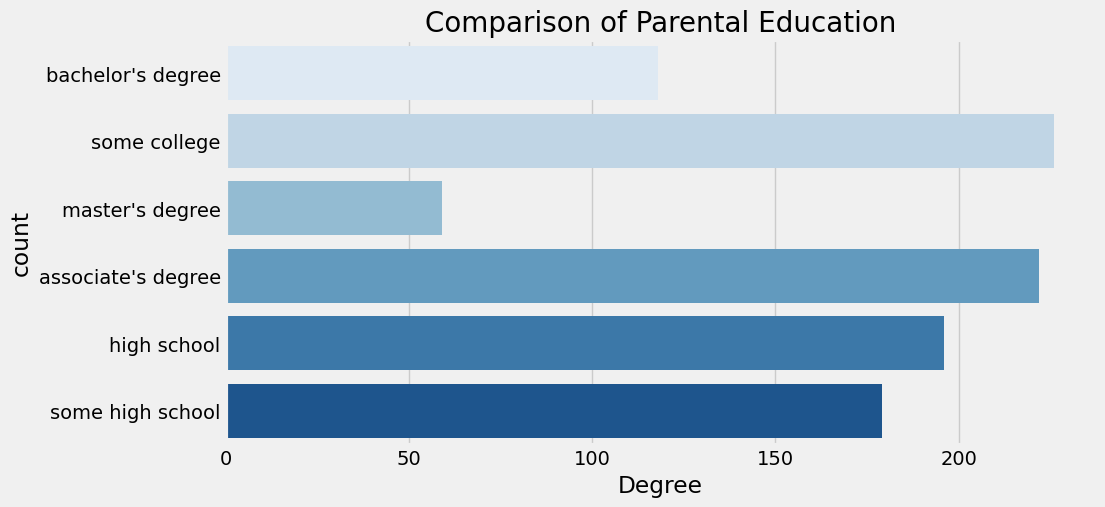

In [66]:
plt.rcParams['figure.figsize'] = (10,5)
plt.style.use('fivethirtyeight')
sns.countplot(df['parental_level_of_education'], palette = 'Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

### Insights
- Largest number of parents are from some college.

### BIVARIATE ANALYSIS ( Is parental education has any impact on student's performance ? )

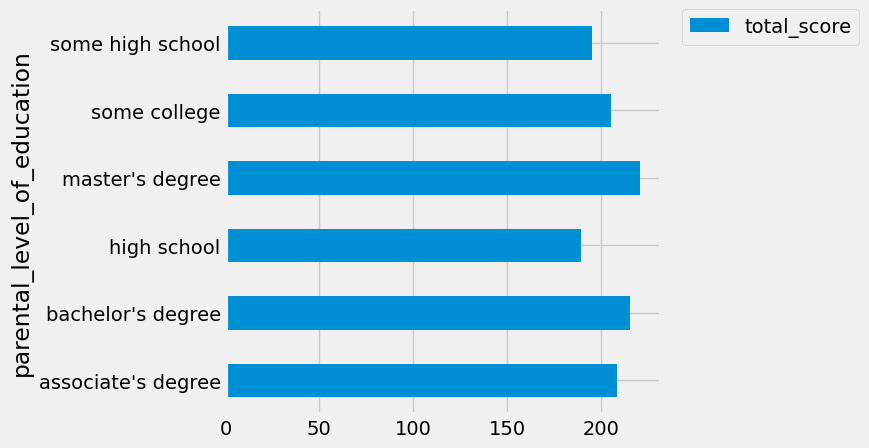

In [72]:


df.groupby('parental_level_of_education')['total_score'].mean().plot(kind='barh',figsize=(5,5))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

### Insights
- The score of student whose parents possess master and bachelor level education are higher than others.

## 4.LUNCH COLUMN
- Which type of lunch is most common amoung students ?
- What is the effect of lunch type on test results?

### UNIVARIATE ANALYSIS ( Which type of lunch is most common amoung students ? )

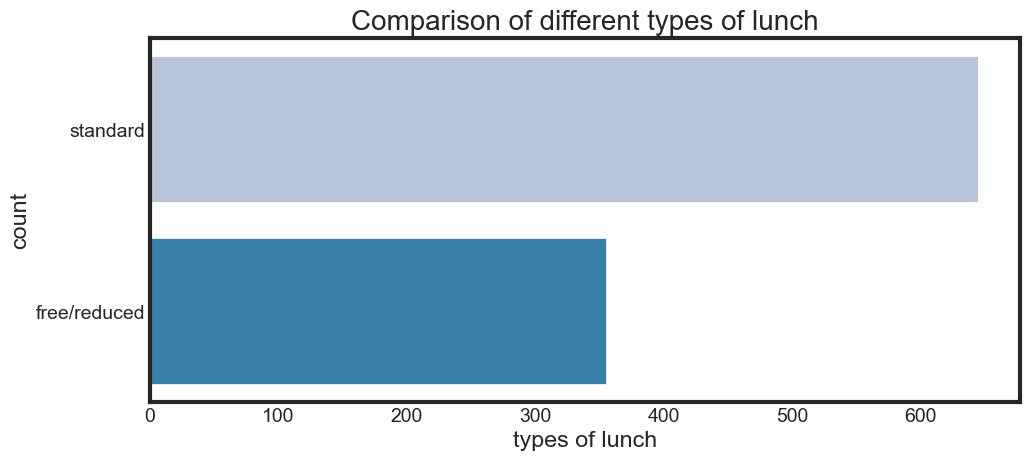

In [77]:
sns.set_style("ticks")
plt.rcParams['figure.figsize'] = (10,4.5)
sns.countplot(df['lunch'], palette = 'PuBu')
plt.title('Comparison of different types of lunch', fontweight = 30, fontsize = 20)
plt.xlabel('types of lunch')
plt.ylabel('count')
plt.show()

### Insights
- Students being served Standard lunch was more than free lunc

### BIVARIATE ANALYSIS ( Is lunch type intake has any impact on student's performance ? )

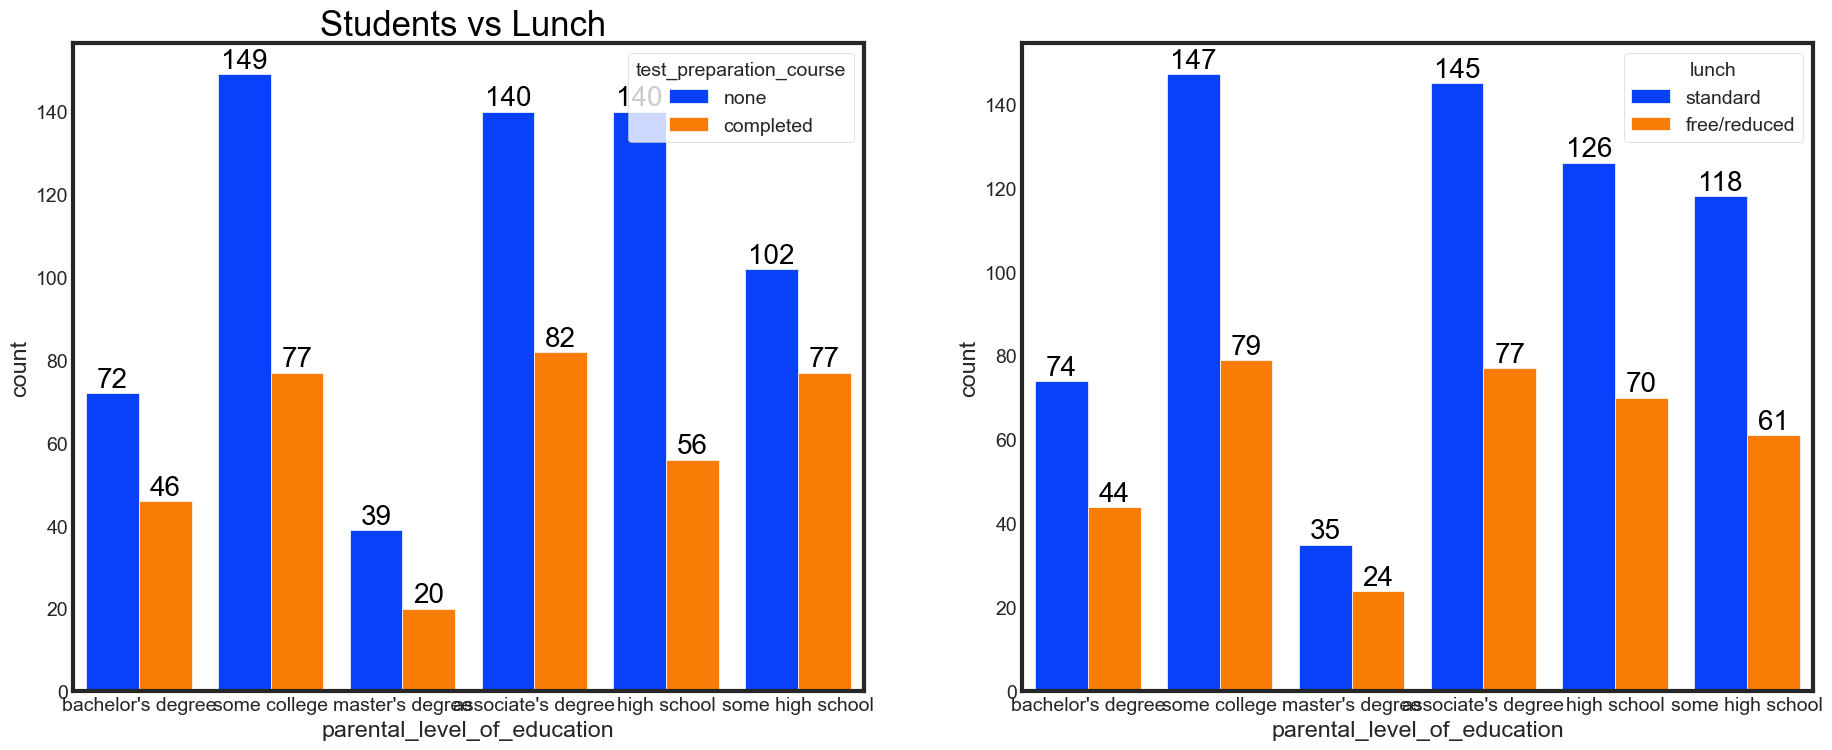

In [80]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.countplot(x=df['parental_level_of_education'],data=df,palette = 'bright',hue='test_preparation_course',saturation=0.95,ax=ax[0])
ax[0].set_title('Students vs test preparation course ',color='black',size=25)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
sns.countplot(x=df['parental_level_of_education'],data=df,palette = 'bright',hue='lunch',saturation=0.95,ax=ax[1])
ax[0].set_title('Students vs Lunch ',color='black',size=25)
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=20)  

## 6.TEST PREPARATION COURSE COLUMN
- Which type of lunch is most common amoung students ?
- Is Test prepration course has any impact on student's performance ?

### BIVARIATE ANALYSIS ( Is Test prepration course has any impact on student's performance ? )

<Axes: xlabel='lunch', ylabel='writing_score'>

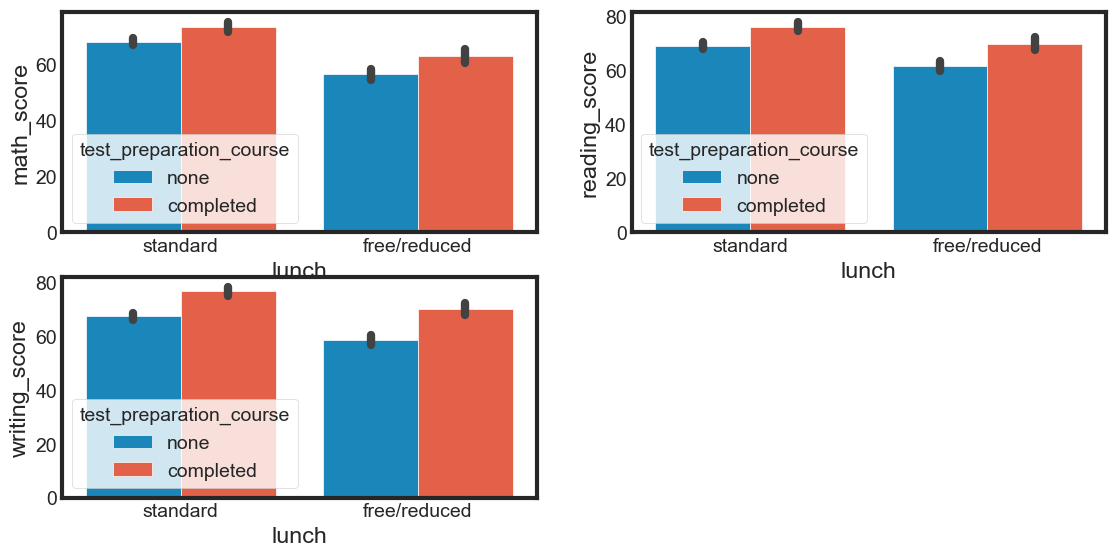

In [81]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.barplot (x=df['lunch'], y=df['math_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,2)
sns.barplot (x=df['lunch'], y=df['reading_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,3)
sns.barplot (x=df['lunch'], y=df['writing_score'], hue=df['test_preparation_course'])

### Insights
- Students who have completed the Test Prepration Course have scores higher in all three categories than those who haven't taken the course

## 7.Check out Outliers

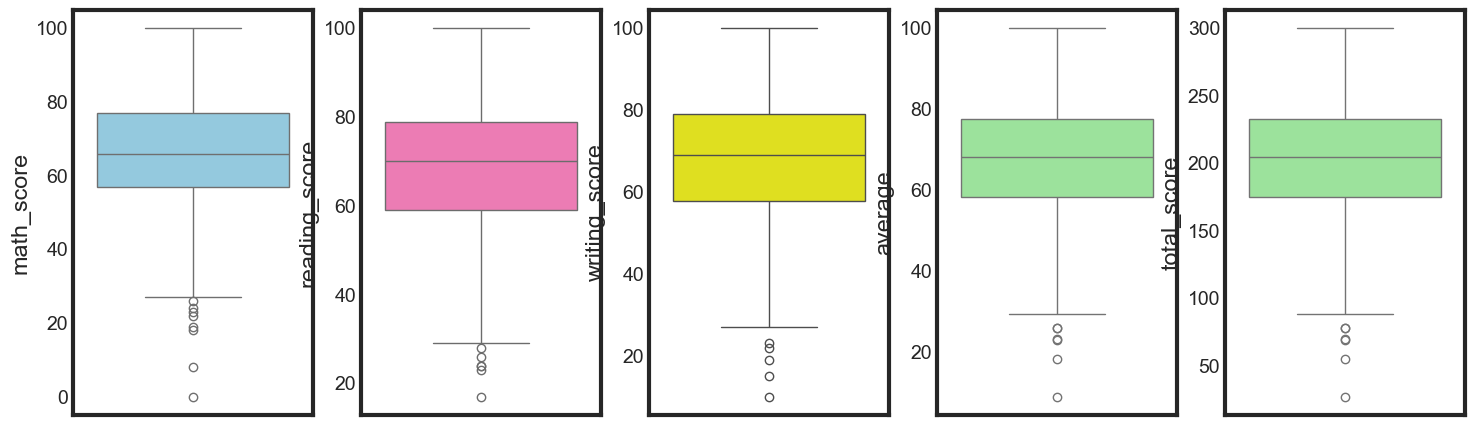

In [83]:
plt.subplots(1,5,figsize=(16,5))
plt.subplot(151)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(152)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(153)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(154)
sns.boxplot(df['average'],color='lightgreen')
plt.subplot(155)
sns.boxplot(df['total_score'],color='lightgreen')
plt.show()

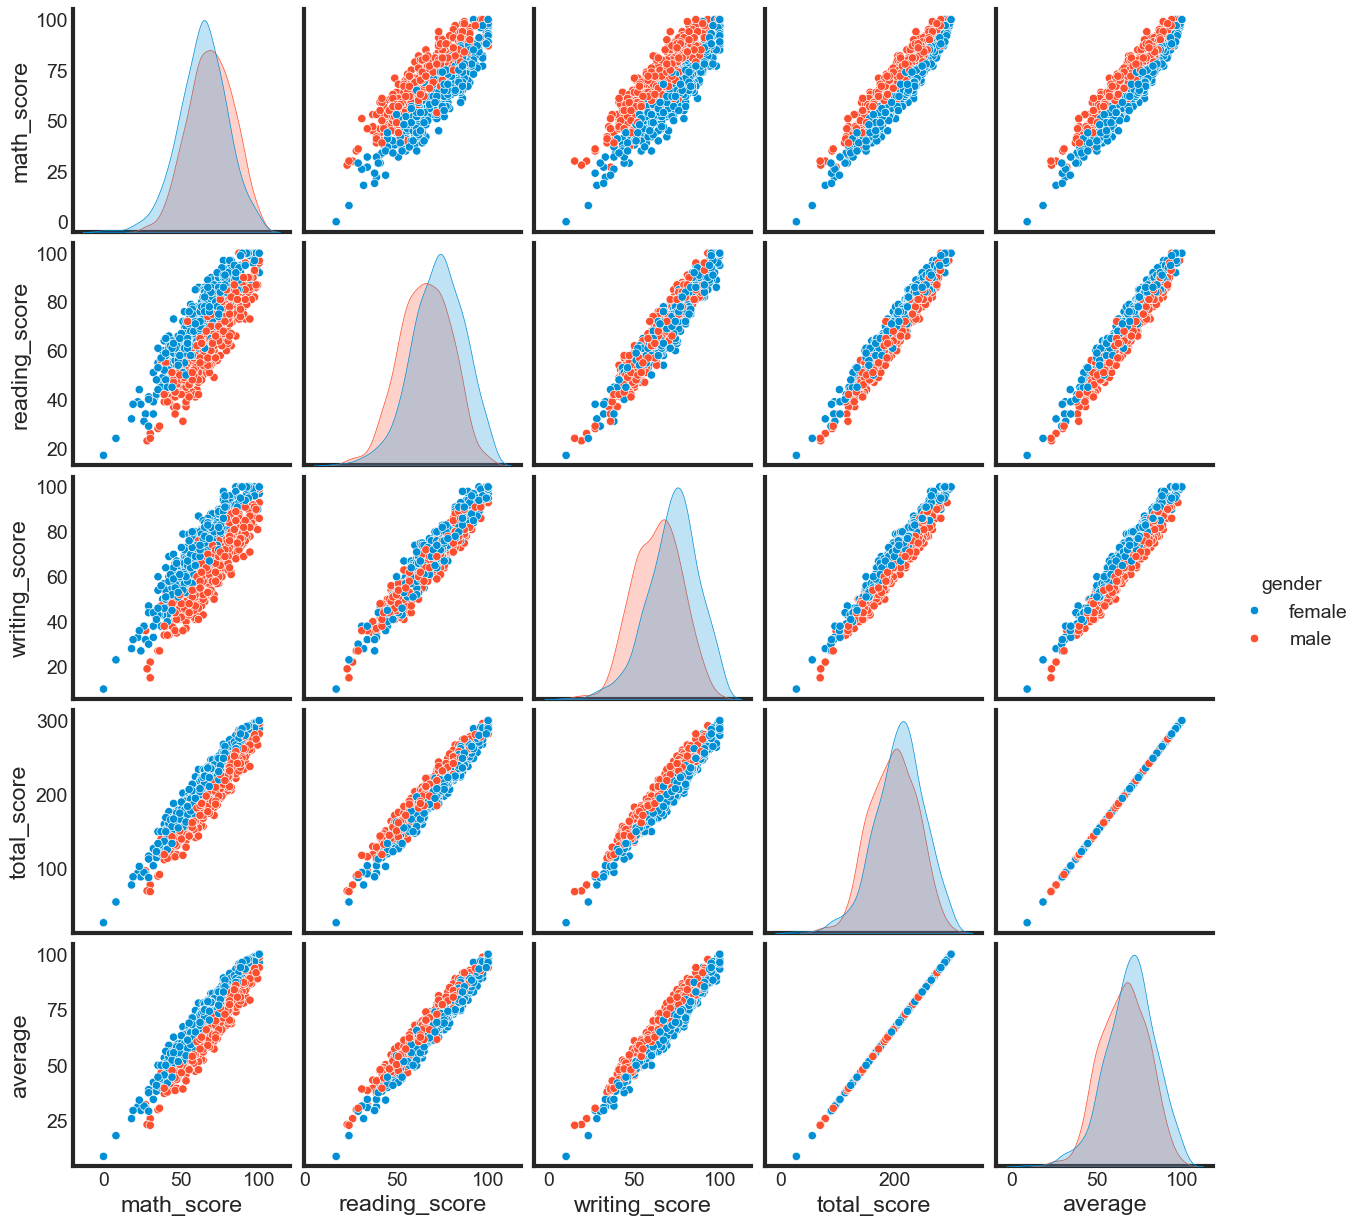

In [84]:
sns.pairplot(df,hue = 'gender')
plt.show()

### Insights
From the above plot it is clear that all the scores increase linearly with each other.

# Conclusions
- Student's Performance is related with lunch, race, parental level education
- Females lead in pass percentage and also are top-scorers
- Student's Performance is not much related with test preparation course
- Finishing preparation course is benefitial.